In [1]:
using Plots
using Random
using LinearAlgebra

In [2]:
function vandermonde(x,y,grau)
    n,=size(y) #pegando o tamanho do vetor y
    V=zeros(n, grau+1) #criando uma matriz de zeros
    for i=1:n #linhas
        for j=1:(grau+1) #colunas
            V[i,j]=x[i]^(j-1) #calculando as resprectivas potencias do polinomio
        end
    end
    return V # retona a matriz de vandermonde
end

vandermonde (generic function with 1 method)

In [3]:
function regressão(x,y,grau)
    V=vandermonde(x,y,grau) #montando a matriz de vondermonde
    c=V\y # resolve o  sistema linear. já faz minimos quadrados
    return c #retorna os coeficientes
end

regressão (generic function with 1 method)

In [ ]:
#exercicio 1 - calcular T = c0x^c1

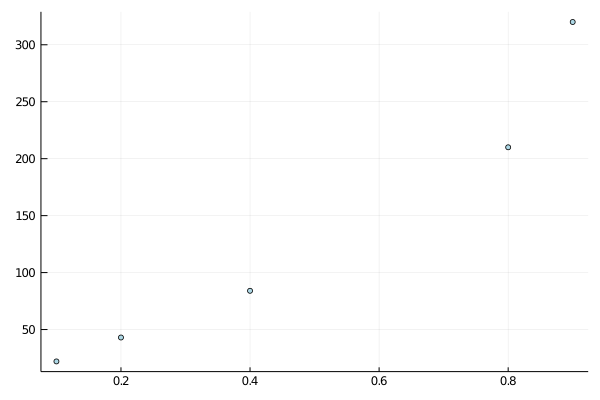

In [4]:
x=[0.1; 0.2; 0.4; 0.8 ; 0.9]    #pontos de x
y=[22;  43;  84;   210 ; 320 ]  #pontos de y
scatter(x, y ,c=:lightblue, ms=3, leg=false)

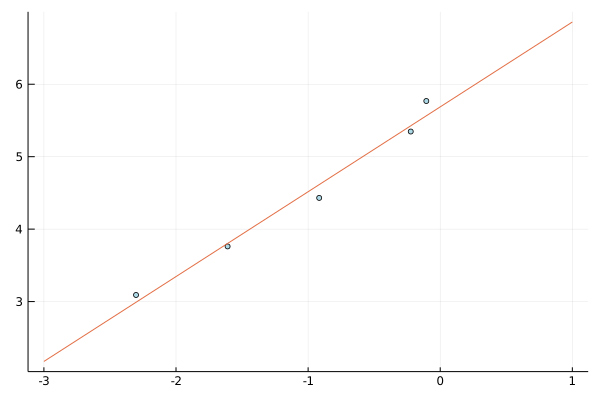

In [24]:
#linearizando os pontos para encontrar os coeficientes
y_barra=log.(y)   #calculando o ln dos pontos de y
x_barra=log.(x)   #calculando o ln dos pontos de x

c_barra=regressão(x_barra, y_barra, 1)   #calculando os coeficientes por regressão de grau 1, pois linearizamos
poli_barra(x) = c_barra[1]+c_barra[2]*x  #Gerando a reta a partir dos coeficientes gerados anteriormente 
scatter(x_barra, y_barra ,c=:lightblue, ms=3, leg=false)   #plotando os pontos linearizados
plot!(poli_barra,-3,1)   #plotando a reta 

In [25]:
c_barra=regressão(x_barra, y_barra, 1)   #calculando os coeficientes por regressão de grau 1, pois linearizamos
c0 = exp(c_barra[1])                     #calculando exp(c0)
c1 = c_barra[2]                          #mantentdo o valor de c1
curva(x) = c0*(x^c1)                      #gerando a curva com os polinomios

curva (generic function with 1 method)

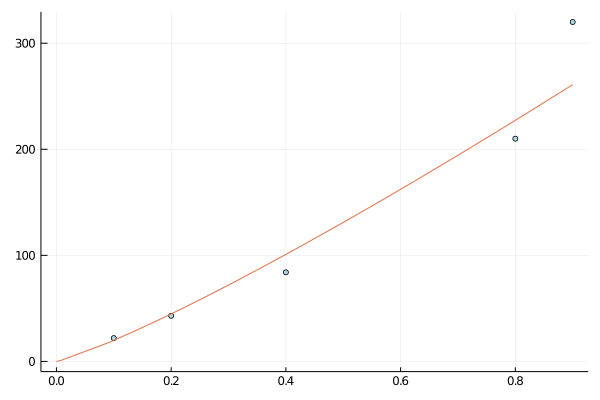

In [26]:
scatter(x, y ,c=:lightblue, ms=3, leg=false)
plot!(curva,0,0.9)

In [27]:
curva(0.3)

72.0611661989366

In [28]:
round(curva(0.3),digits=3)

72.061

In [29]:
function trapezio(f,a,b,n) #calcular a integral f(x) de a até b
    h=(b-a)/n              #calculando o tamanho dos intervalos
    S=0.0                  #soma total da integral
    for i=1:(n-1)          #calcula o "meio"
        x=a+i*h              
        S+=2*f(x)          
    end
    S=h/2*(S+f(a)+f(b)) #calcula "as pontas"
    return S            #retorna a soma
end

trapezio (generic function with 1 method)

In [30]:
function interpolação1(x,y)
    #criar a matriz V
    V=[x.^0 x.^1]  #Matriz de vandermonde
    c=V\y   #vetor de coeficientes
    
    poli(x) = c[1]+c[2]*x  #polinomio montado a partir dos coeficientes encontrados
    
    return poli           #retorna o polinomio
end

interpolação1 (generic function with 1 method)

In [32]:
function interpola_trapezio(x,y,n)
    S=0.0  #soma
    for i=1:n #loop com n intervalos
        poli = interpolação1(x[i:i+1],y[i:i+1]) #gera um polinomio para cada intervalo
        S+=trapezio(poli,x[i],x[i+1],1)           #faz o metodo do trapezio para o polinomio encontrado anteriormente
                                                  # e soma em S
    end
    return S
end

interpola_trapezio (generic function with 1 method)

In [33]:
#Exercicio 2a

x=[0; 10;   15;   20;    32;   59;       62;    125]
y=[0; 185;  319;  447;   742;  1325;   1445;   4151]

8-element Array{Int64,1}:
    0
  185
  319
  447
  742
 1325
 1445
 4151

In [34]:
interpola_trapezio(x,y,7)

219567.5

In [35]:
interpola_trapezio(x[3:4],y[3:4],1)

1915.0

In [ ]:
#Exercicio 2a

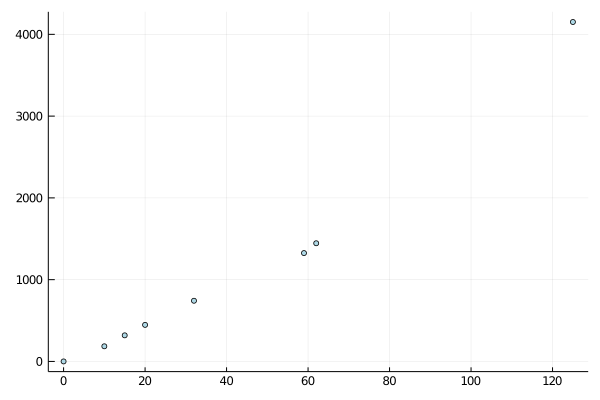

In [41]:
#Exercicio 2c
x=[0; 10;   15;   20;    32;   59;       62;    125]
y=[0; 185;  319;  447;   742;  1325;   1445;   4151]
scatter(x, y,c=:lightblue, ms=3, leg=false)

In [42]:
c=regressão(x,y,1)

2-element Array{Float64,1}:
 -232.97096383346047 
   32.438909320952575

In [45]:
reta(x) = c[1] + c[2]*x

reta (generic function with 1 method)

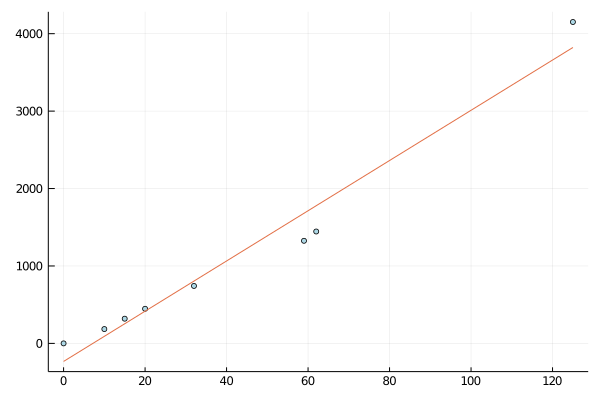

In [46]:
scatter(x, y,c=:lightblue, ms=3, leg=false)
plot!(reta,0,125)

In [40]:
trapezio(reta,0,125,7)

224307.6085907594

In [73]:
#exercicio 3a
function trapezioh(f,a,b,h) #calcular a integral f(x) de a até b
    #h=(b-a)/n    #tamanho do intervalo baseado no numero de intervalos 
    n = (b-a)/h   #numero de intervalos baseado no tamanho do intervalo.
    S=0.0           #soma total da integral
    for i=1:(n-1)  #calcula o "meio"
        x=a+i*h
        S+=2*f(x)
    end
    S=h/2*(S+f(a)+f(b)) #calcula "as pontas"
    return S            #retorna a soma
end

trapezioh (generic function with 1 method)

In [75]:
circulo(x) = sqrt(1-x^2)
trapezioh(circulo,0,1,0.1)

0.7761295815620796

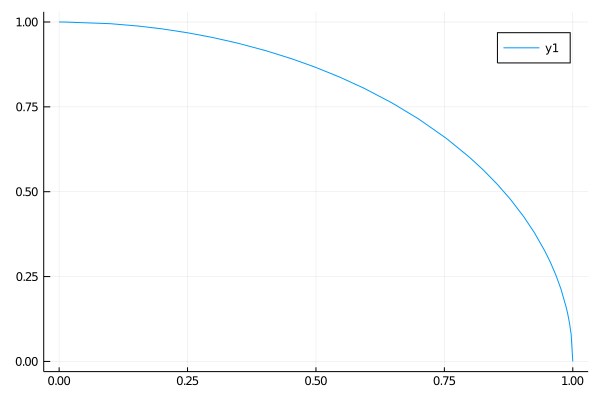

In [77]:
plot(circulo,0,1)

In [82]:
areaQuadrante = (pi * r^2)/4
area/(4 * r^2) = pi

UndefVarError: [91mUndefVarError: r not defined[39m

In [96]:
pi = 4 * trapezioh(circulo,0,1,0.1)

3.1045183262483182

In [ ]:
#Exercicio 4

In [17]:
function trapezio(f,a,b,n) #calcular a integral f(x) de a até b
    h=(b-a)/n           #tamanho dos intervalos baseado no limite de integração e o numero de intervalos
    S=0.0               #soma da integral
    for i=1:(n-1)      #calcula o "meio"
        x=a+i*h        #avanço de x
        S+=2*f(x)      #incrementando a soma
    end
    S=h/2*(S+f(a)+f(b)) #calcula "as pontas"
    return S             #retorna a soma S
end

trapezio (generic function with 1 method)

In [22]:
function Integral(f,a,b)
    return trapezio(f,a,b,1000) # calculando uma integral com 1000 intervalos
end

Integral (generic function with 1 method)

In [28]:
function Integral_Dupla(funcao,hy,gy,a,b) #integral dupla de funcao(x,y) de g(y) até g(y) no x e de a até b no y
    function g(y)
        f(x)=funcao(x,y)                #função passada com 2 parametros
        return Integral(f,hy(y),gy(y)) # integrando de h(y) até g(y) em relação a x
    end
    return Integral(g,a,b) #integrando agora o resultado de a até b em relação a y
end

Integral_Dupla (generic function with 1 method)

In [29]:
f(x,y) = x*y
h(y) = y
g(y) = 2y

g (generic function with 1 method)

In [30]:
Integral_Dupla(f,h,g,0,1)

0.3750003750000003

In [27]:
#Exercicio 5
function cost_function(x, y, teta)
    m = size(x)[1] #sample size
    loss = x * teta - y #calculate the loss vector
    cost = (1/2m) * (loss' * loss)
    return cost
end

cost_function (generic function with 1 method)

In [39]:
function linear_reg_grad_d(x,y,a, fit_intercept=t, n_iter=5)
    m=length(y) #Sample Size(number of rows)
    
    if fit_intercept
        constant=ones(m,1)
        x = hcat(constant,x)
    else
        x
    end
    
    n= size(x)[2] #number of features (columns)
    teta = zeros(n)
    J = zeros(n_iter) #initial cost vector
    
    for iter in range(1, stop=n_iter)
        pred = x * teta
        J[iter] = cost_function(x,y,teta)
        teta = teta - ((a/m) * x')*(pred - y);
        
    end
    
    return(teta, J) #the thow parameters and the 1000 cost function values
end

linear_reg_grad_d (generic function with 3 methods)

In [46]:
x=[0.1; 0.2; 0.4; 0.8 ; 0.9]    #pontos de x
y=[22;  43;  84;   210 ; 320 ]  #pontos de y
x_barra = log.(x)
y_barra = log.(y)

5-element Array{Float64,1}:
 3.091042453358316 
 3.7612001156935624
 4.430816798843313 
 5.3471075307174685
 5.768320995793772 

In [54]:
linear_reg_grad_d(x_barra,y_barra,1,true,1)

([4.4797, -3.80633], [10.5198])

In [55]:
poli(x) = 86.9603 + 125.923*x

poli (generic function with 1 method)

In [56]:
c0 = exp(4.4797)
c1 = -3.80633
poli(x) = c0*(x^c1)

poli (generic function with 1 method)

In [57]:
poli(0.3)

8624.97897564265